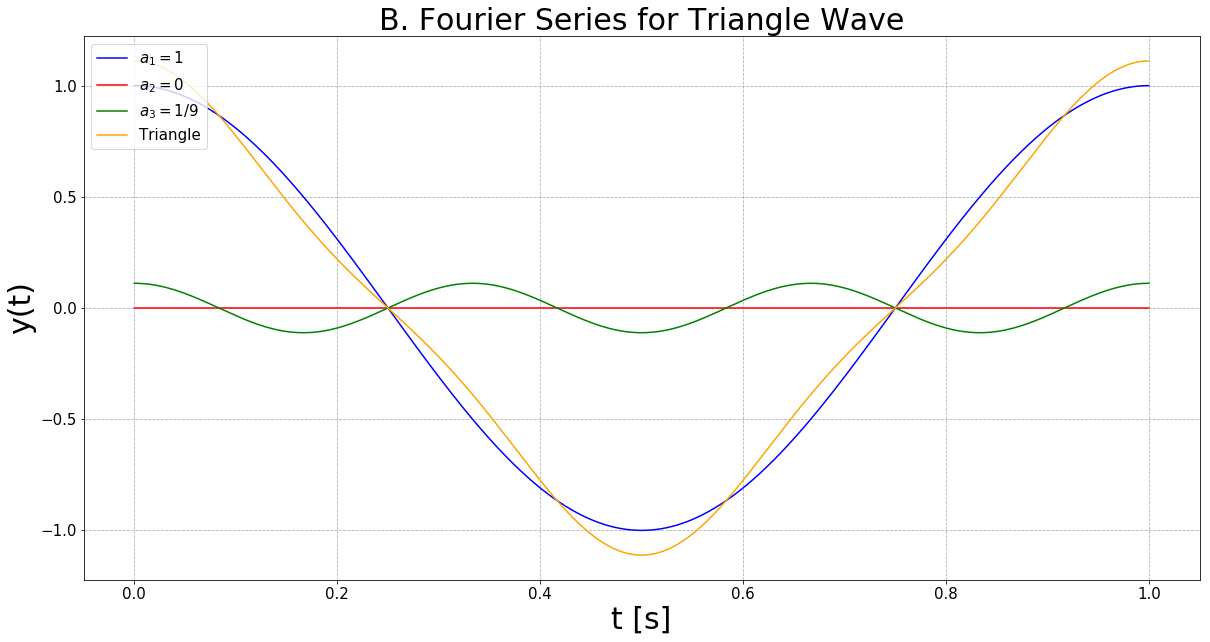

In [14]:
# Import the required modules
import matplotlib.pyplot as plt
import numpy as np

# Command to plot the figures inline in Jupyter environment
%matplotlib inline

fund_f = 1
a = [1, 0, 1/9]
t = np.arange(0, 1, 1/8000)
y1 = []
y2 = []
y3 = []
y = []

for i in range(len(t)):
    value = a[0]*np.cos(2*np.pi*1*fund_f*t[i])
    y1.append(value)
    value = a[1]*np.cos(2*np.pi*2*fund_f*t[i])
    y2.append(value)
    value = a[2]*np.cos(2*np.pi*3*fund_f*t[i])
    y3.append(value)

y = np.add(np.add(y1, y2), y3)

plt.figure(figsize=(20,10))
plt.title("B. Fourier Series for Triangle Wave", fontsize=30)
plt.xlabel('t [s]', fontsize=30)
plt.ylabel("y(t)", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(linestyle='dashed')
plt.plot(t, y1, label=r'$a_1 = 1$', color='blue')
plt.plot(t, y2, label=r'$a_2 = 0$', color='red')
plt.plot(t, y3, label=r'$a_3 = 1/9$', color='green')
plt.plot(t, y, label='Triangle', color='orange')
plt.legend(loc='upper left', fontsize=15)


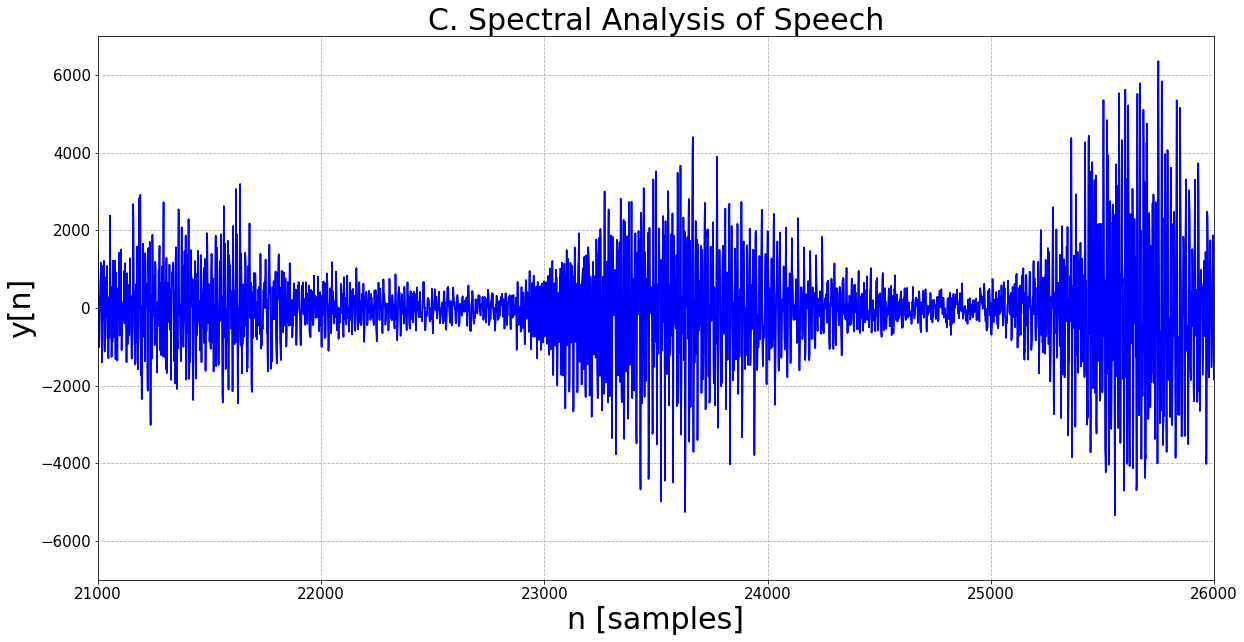

In [1]:
# Import the required modules
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

# Command to plot the figures inline in Jupyter environment
%matplotlib inline

rate, data = wav.read('Downloads/soundfile_8k.wav')

plt.figure(figsize=(20,10))
plt.title("C. Spectral Analysis of Speech", fontsize=30)
plt.xlabel('n [samples]', fontsize=30)
plt.ylabel("y[n]", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(21000, 26000)
plt.ylim(-7000, 7000)
plt.grid(linestyle='dashed')
plt.plot(data, color='blue')

# This part of the file most closely resembles the vowel sound "hood"


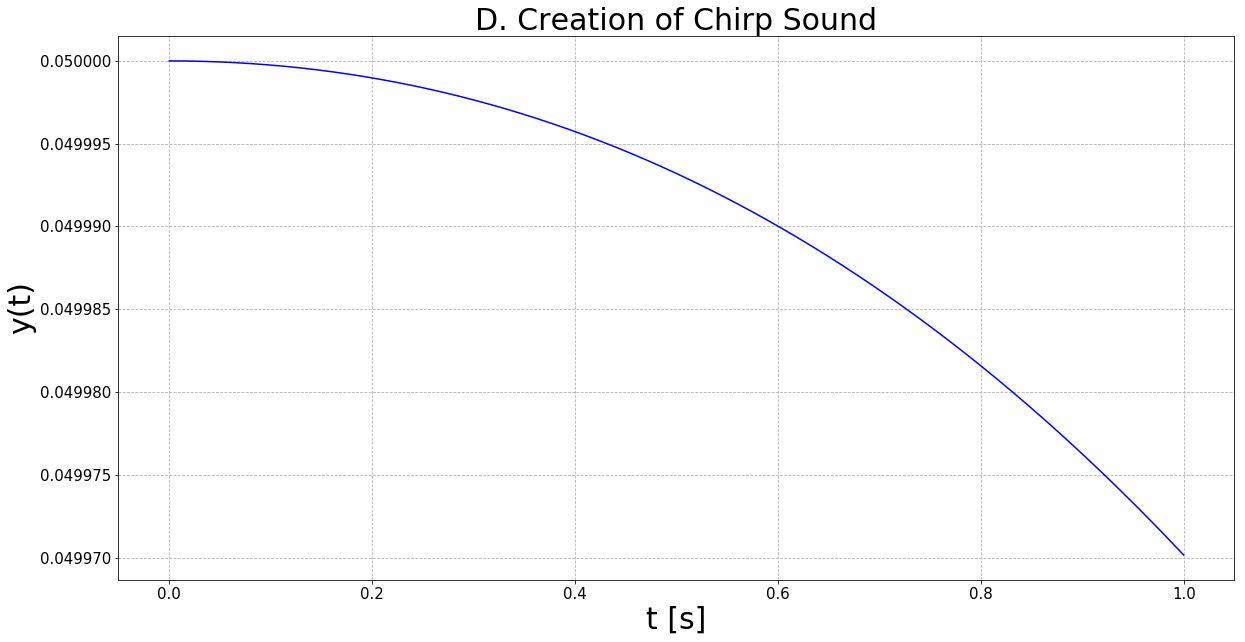

In [15]:
# Import the required modules
import matplotlib.pyplot as plt
import numpy as np

# Command to plot the figures inline in Jupyter environment
%matplotlib inline

t = np.arange(0, 1, 1/8000)
f = np.arange(1/200, (1/200)+(1/2000), 1/16000000)
y = []

for i in range(len(t)):
    value = (1/20)*np.cos(2*np.pi*f[i]*t[i])
    y.append(value)

plt.figure(figsize=(20,10))
plt.title("D. Creation of Chirp Sound", fontsize=30)
plt.xlabel('t [s]', fontsize=30)
plt.ylabel("y(t)", fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(linestyle='dashed')
plt.plot(t, y, label='Triangle', color='blue')
